In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
square_feet = []
prices = []

with open("housing_prices.csv", "r") as f:
    next(f)
    for line in f:
        parts = line.strip().split(",")

        sqft = int(parts[0])
        price = int(parts[1])

        square_feet.append(sqft)
        prices.append(price)

print(square_feet)
print(prices)


[1100, 1400, 1425, 1550, 1600, 1700, 1750, 1800, 1875, 2000, 2100, 2250, 2300, 2400, 2450, 2600, 2800, 2900, 3000, 3150, 3300]
[199000, 245000, 230000, 215000, 280000, 295000, 345000, 315000, 325000, 360000, 350000, 385000, 390000, 425000, 415000, 455000, 465000, 495000, 510000, 545000, 570000]


In [114]:
x = np.array(square_feet)
y = np.array(prices)

x=x.reshape(-1, 1)
y=y.reshape(-1, 1)

In [115]:
x_mean = np.mean(x)
x_std  = np.std(x)

x_scaled = (x - x_mean) / x_std

In [116]:
m_scaled=0.0
b_scaled=0.0
epochs=50
alpha=0.8
for epoch in range(epochs):
    y_pred = np.dot(x_scaled, m_scaled) + b_scaled
    error = y_pred - y
    m_scaled -= alpha * (1/len(y)) * np.dot(x_scaled.T, error)
    b_scaled -= alpha * (1/len(y)) * np.sum(error)

In [117]:
m=float(m_scaled / x_std)
b=float(b_scaled - m_scaled * x_mean / x_std)

print("slope=", m)
print("intercept=", b)

slope= 171.1732732937618
intercept= 1627.3680380250444


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27772\3344384694.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m=float(m_scaled / x_std)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27772\3344384694.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b=float(b_scaled - m_scaled * x_mean / x_std)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27772\1033375431.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


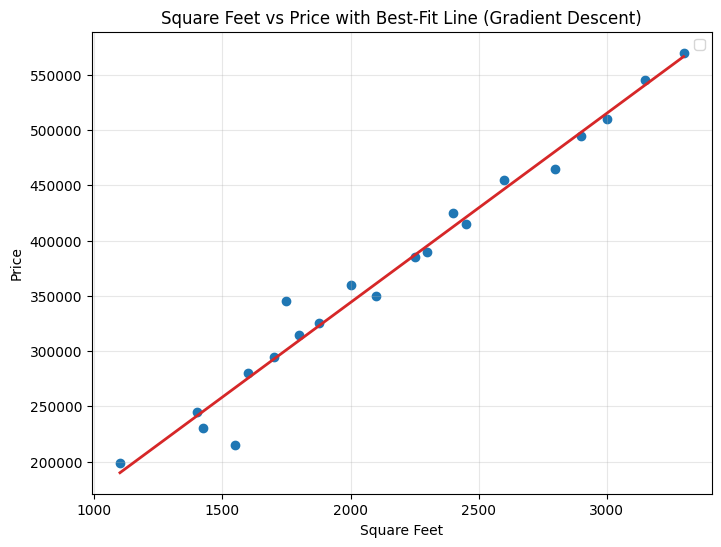

In [118]:
sq = np.array(square_feet)
pr = np.array(prices)

plt.figure(figsize=(8,6))
plt.scatter(sq, pr)

xs = np.linspace(sq.min(), sq.max(), 200)
ys = m * xs + b
plt.plot(xs, ys, color='tab:red', linewidth=2)

plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Square Feet vs Price with Best-Fit Line (Gradient Descent)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [119]:
prediced_price = m * 2500 + b
print(f"Predicted price for a house with 2500 square feet from Gradient Descent: ${prediced_price:.2f}")

Predicted price for a house with 2500 square feet from Gradient Descent: $429560.55
